In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [2]:
dataset = pd.read_csv("sample/car_evaluation.csv")

dataset.head(15)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [3]:
dataset.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [4]:
dataset.rename(columns = {'vhigh':'price_buying', 'vhigh.1':'price_maintanance','2':'doors','2.1':'seaters','small':'bootspace','low':'safety','unacc':'decision'}, inplace = True)

In [5]:
dataset.columns

Index(['price_buying', 'price_maintanance', 'doors', 'seaters', 'bootspace',
       'safety', 'decision'],
      dtype='object')

In [6]:
# summarize all null values

dataset.isnull().sum()


price_buying         0
price_maintanance    0
doors                0
seaters              0
bootspace            0
safety               0
decision             0
dtype: int64

In [7]:
categorical = [cat_var for cat_var in dataset.columns if dataset[cat_var].dtypes == 'O']
print(categorical)


['price_buying', 'price_maintanance', 'doors', 'seaters', 'bootspace', 'safety', 'decision']


In [8]:
numerical = [num_var for num_var in dataset.columns if dataset[num_var].dtypes != 'O']
print(numerical)

[]


In [9]:
dataset['price_buying'].value_counts()

low      432
med      432
high     432
vhigh    431
Name: price_buying, dtype: int64

In [10]:
dataset['price_maintanance'].value_counts()

low      432
med      432
high     432
vhigh    431
Name: price_maintanance, dtype: int64

In [11]:
dataset['doors'].value_counts()

5more    432
3        432
4        432
2        431
Name: doors, dtype: int64

In [12]:
dataset['seaters'].value_counts()

more    576
4       576
2       575
Name: seaters, dtype: int64

In [13]:
dataset['bootspace'].value_counts()

big      576
med      576
small    575
Name: bootspace, dtype: int64

In [14]:
dataset['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [15]:
dataset['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [16]:
# We have decided that the decision as the target variable

In [17]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [18]:
import category_encoders as ce
encoders = ce.OrdinalEncoder(cols = ['price_buying', 'price_maintanance', 'doors', 'seaters', 'bootspace', 'safety'])


In [19]:
x1 = dataset.drop(['decision'], axis = 1)
y1 = dataset['decision']

In [20]:
x1 = encoders.fit_transform(x1)

C:\Anaconda_Navigator\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
from sklearn.model_selection import train_test_split as ttst
x1_train, x1_test, y1_train, y1_test = ttst(x1,y1, test_size = 0.45, random_state = 0)



In [22]:
# Entrophy or criterion entrophy
from sklearn.tree import DecisionTreeClassifier as DTC
classifier_entr = DTC(criterion = 'entropy', max_depth = 4, random_state = 0)
classifier_entr.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [23]:
yentropy_predict = classifier_entr.predict(x1_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm1 = confusion_matrix(y1_test,yentropy_predict)
acs1 = accuracy_score(y1_test,yentropy_predict) * 100
entr_clsrpr = classification_report(y1_test,yentropy_predict)

print(" The accuracy score is:  ",acs1," \n and the confusion matrix are: \n \n ", cm1, "\n \n \n \n \n \n "," Classification Report \n \n ",entr_clsrpr)

 The accuracy score is:   84.06169665809769  
 and the confusion matrix are: 
 
  [[145  28   0   0]
 [  0  29   0   0]
 [ 57   2 480   0]
 [  5  32   0   0]] 
 
 
 
 
 
   Classification Report 
 
                precision    recall  f1-score   support

         acc       0.70      0.84      0.76       173
        good       0.32      1.00      0.48        29
       unacc       1.00      0.89      0.94       539
       vgood       0.00      0.00      0.00        37

    accuracy                           0.84       778
   macro avg       0.50      0.68      0.55       778
weighted avg       0.86      0.84      0.84       778



C:\Anaconda_Navigator\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


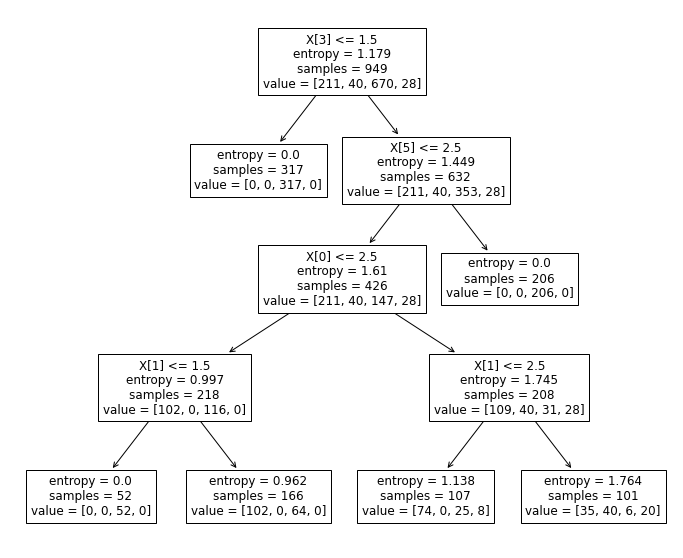

In [25]:
# visualise entropy decision tree

plt.figure(figsize = (12,10))
from sklearn import tree
tree.plot_tree(classifier_entr.fit(x1_train, y1_train))

plt.show()

In [26]:
# Let us see criterion gini

x2 = dataset.drop(['decision'], axis = 1)
y2 = dataset['decision']

In [27]:
x2 = encoders.fit_transform(x2)

C:\Anaconda_Navigator\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [28]:
from sklearn.model_selection import train_test_split as ttst
x2_train, x2_test, y2_train, y2_test = ttst(x2,y2, test_size = 0.45, random_state = 0)



In [36]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier_gini = DTC(criterion = 'gini', max_depth = 4, random_state = 0)
classifier_gini.fit(x2_train, y2_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [37]:
ygini_predict = classifier_gini.predict(x2_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm2 = confusion_matrix(y2_test,ygini_predict)
acs2 = accuracy_score(y2_test,ygini_predict) * 100
gini_clsrpr = classification_report(y2_test,ygini_predict)

print(" The accuracy score is:  ",acs2," \n and the confusion matrix are: \n \n ", cm2, "\n \n \n \n \n \n "," Classification Report \n \n ",gini_clsrpr)

 The accuracy score is:   85.34704370179949  
 and the confusion matrix are: 
 
  [[131  28  14   0]
 [  0  29   0   0]
 [ 33   2 504   0]
 [  5  32   0   0]] 
 
 
 
 
 
   Classification Report 
 
                precision    recall  f1-score   support

         acc       0.78      0.76      0.77       173
        good       0.32      1.00      0.48        29
       unacc       0.97      0.94      0.95       539
       vgood       0.00      0.00      0.00        37

    accuracy                           0.85       778
   macro avg       0.52      0.67      0.55       778
weighted avg       0.86      0.85      0.85       778



C:\Anaconda_Navigator\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


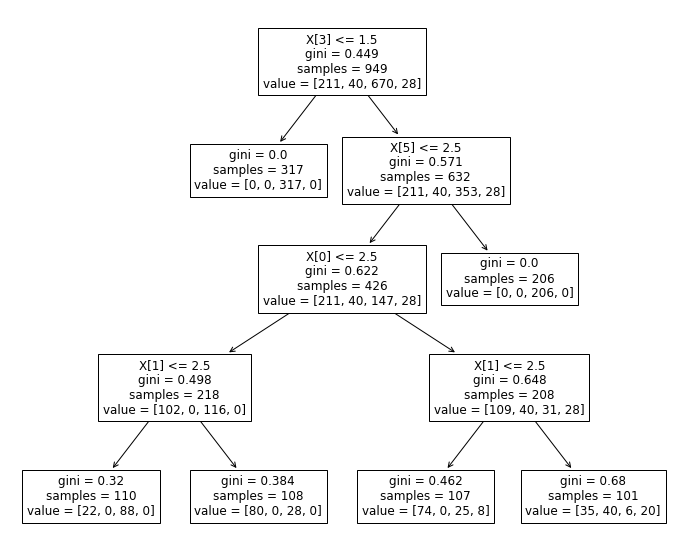

In [39]:
# visualise entropy decision tree

plt.figure(figsize = (12,10))
from sklearn import tree
tree.plot_tree(classifier_gini.fit(x2_train, y2_train))

plt.show()

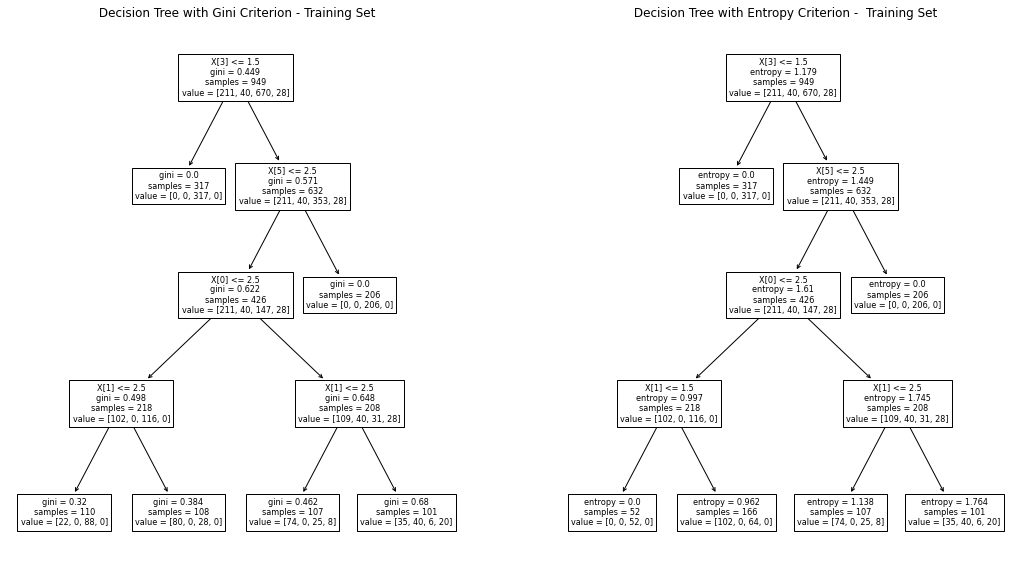

In [49]:
figsize, ax = plt.subplots(figsize = (18,10))
from sklearn import tree

plt.subplot(1,2,1)
tree.plot_tree(classifier_gini.fit(x2_train, y2_train))
plt.title(" Decision Tree with Gini Criterion - Training Set")

plt.subplot(1,2,2)
tree.plot_tree(classifier_entr.fit(x1_train, y1_train))
plt.title(" Decision Tree with Entropy Criterion -  Training Set")

plt.show()

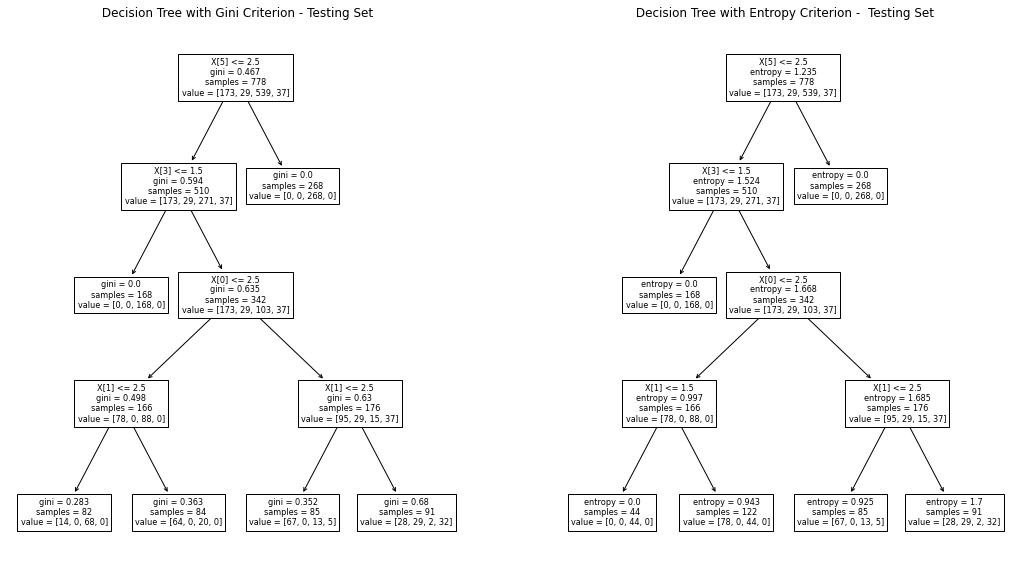

In [48]:
figsize, ax = plt.subplots(figsize = (18, 10))
from sklearn import tree

plt.subplot(1,2,1)
tree.plot_tree(classifier_gini.fit(x2_test, y2_test))
plt.title(" Decision Tree with Gini Criterion - Testing Set")

plt.subplot(1,2,2)
tree.plot_tree(classifier_entr.fit(x1_test, y1_test))
plt.title(" Decision Tree with Entropy Criterion -  Testing Set")

plt.show()

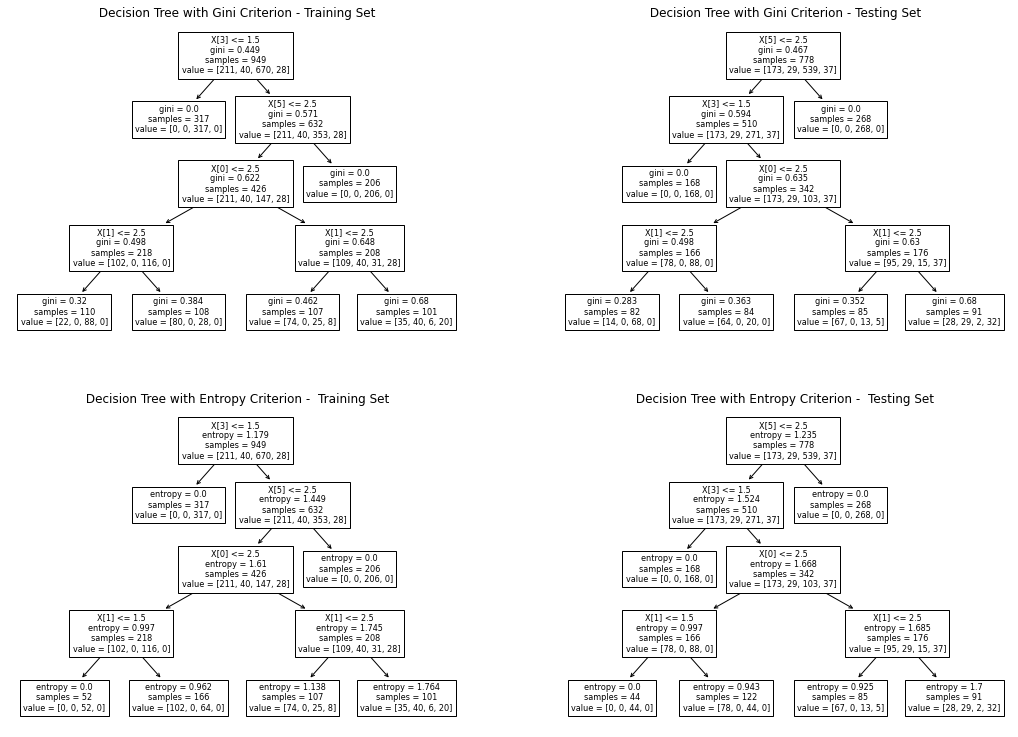

In [54]:
figsize, ax = plt.subplots(2,2, figsize = (18, 13))

plt.subplot(2,2,1)
tree.plot_tree(classifier_gini.fit(x2_train, y2_train))
plt.title(" Decision Tree with Gini Criterion - Training Set")

plt.subplot(2,2,2)
tree.plot_tree(classifier_gini.fit(x2_test, y2_test))
plt.title(" Decision Tree with Gini Criterion - Testing Set")


plt.subplot(2,2,3)
tree.plot_tree(classifier_entr.fit(x1_train, y1_train))
plt.title(" Decision Tree with Entropy Criterion -  Training Set")

plt.subplot(2,2,4)
tree.plot_tree(classifier_entr.fit(x1_test, y1_test))
plt.title(" Decision Tree with Entropy Criterion -  Testing Set")

plt.show()